<a href="https://colab.research.google.com/github/SamuellHMP/PCO102-2022.1/blob/main/PCO102_02_Metodologias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodologias

Foram escolhidas duas metodologias para abordar o problema: redes neurais artificiais e correlação cruzada:

1. Redes Neurais Artificiais (RNAs) são um método de Inteligência Artificial para simular o efeito de múltiplas variáveis em um parâmetro principal por uma função de aptidão. Elas fornecem soluções desejáveis para problemas complexos, pois podem interpretar as relações compostas entre os vários parâmetros envolvidos em um problema. Uma das principais vantagens das RNAs é que elas podem simular tanto relações lineares quanto relações não lineares entre parâmetros, usando as informações fornecidas para treinar a rede. São também conhecidas como processamento paralelo distribuído e basicamente são a representação algorítmica de métodos que o cérebro humano usa para aprender. RNAs são redes de sistemas de computação compostas de uma série de elementos de processamento simples e altamente interconectados, que processam informações buscando respostas dinâmicas para entradas externas. Caracterizam-se por ser modelos simples e tolerantes a falhas que não requerem informações para identificar os parâmetros relacionados e não requerem a descrição matemática dos fenômenos envolvidos no processo.

2. Em processamento de sinais, relação cruzada ou correlação cruzada é uma medida de similaridade entre dois sinais em função de um atraso aplicado a um deles. Também é conhecida como produto interno deslizante. A relação cruzada é frequentemente utilizada quando se deseja procurar por um sinal de curta duração que esteja inserido em um sinal mais longo. A relação cruzada é muito semelhante em natureza à convolução de duas funções. Porém, ao contrário da convolução, na relação cruzada não há espelhamento de um dos sinais. Outra importante propriedade que distingue estas duas operações é que a convolução é comutativa, o mesmo não ocorre na relação cruzada. Quando ambas as funções de entrada em uma relação cruzada são a mesma função, a relação cruzada é conhecida por autocorrelação.

# Rede Neural Artificial

In [ ]:
import numpy as np
import pandas as pd
import gdown

In [ ]:
gdown.download(url='https://drive.google.com/uc?id=1lOWV8oBweRPSdUhZNRzEPZsD0R5VxGaX', output='Carla_Simulator.csv')

Downloading...
From: https://drive.google.com/uc?id=1lOWV8oBweRPSdUhZNRzEPZsD0R5VxGaX
To: /content/Carla_Simulator.csv
100%|██████████| 12.6M/12.6M [00:00<00:00, 185MB/s]


'Carla_Simulator.csv'

Análise inicial dos dados

In [ ]:
data = pd.read_csv("Carla_Simulator.csv",index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99358 entries, 0 to 99357
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   accelX  99358 non-null  float64
 1   accelY  99358 non-null  float64
 2   accelZ  99358 non-null  float64
 3   class   99358 non-null  object 
 4   gyroX   99358 non-null  float64
 5   gyroY   99358 non-null  float64
 6   gyroZ   99358 non-null  float64
dtypes: float64(6), object(1)
memory usage: 6.1+ MB


Checanco rótulos

In [ ]:
data['class'].unique()

array(['apo', 'onder', 'hurcan', 'gonca', 'mehdi', 'berk', 'selin'],
      dtype=object)

Codificação do rótulo --> String para Integer

In [ ]:
x = data.drop(["class"],axis=1)
y = data["class"].values
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

Separação dos conjuntos de treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True)
print("Train Set Shape: ", X_train.shape)
print("Test Set Shape: ", X_test.shape)

Train Set Shape:  (74518, 6)
Test Set Shape:  (24840, 6)


Codificação categórica para usar categorical_loss no API keras

In [ ]:
from tensorflow.python.keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Dropout

early_stop = EarlyStopping(monitor='loss', patience=2)
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(6,),kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(256, activation='relu',kernel_initializer='random_uniform'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu',kernel_initializer='random_uniform'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu',kernel_initializer='random_uniform'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(7, activation='softmax',kernel_initializer='random_uniform'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [ ]:
hist = model.fit(X_train , y_train , epochs=10, validation_split=0.2)

Epoch 1/10
1863/1863 [==============================] - 19s 9ms/step - loss: 1.8771 - accuracy: 0.2054 - val_loss: 1.8590 - val_accuracy: 0.2220
Epoch 2/10
1863/1863 [==============================] - 16s 9ms/step - loss: 1.8612 - accuracy: 0.2168 - val_loss: 1.8500 - val_accuracy: 0.2248
Epoch 3/10
1863/1863 [==============================] - 17s 9ms/step - loss: 1.8485 - accuracy: 0.2290 - val_loss: 1.8332 - val_accuracy: 0.2434
Epoch 4/10
1863/1863 [==============================] - 17s 9ms/step - loss: 1.8274 - accuracy: 0.2466 - val_loss: 1.8192 - val_accuracy: 0.2498
Epoch 5/10
1863/1863 [==============================] - 16s 9ms/step - loss: 1.8191 - accuracy: 0.2512 - val_loss: 1.8101 - val_accuracy: 0.2615
Epoch 6/10
1863/1863 [==============================] - 17s 9ms/step - loss: 1.8153 - accuracy: 0.2560 - val_loss: 1.8097 - val_accuracy: 0.2611
Epoch 7/10
1863/1863 [==============================] - 18s 10ms/step - loss: 1.8117 - accuracy: 0.2553 - val_loss: 1.8054 - val_a

Em https://www.kaggle.com/code/dasmehdixtr/driver-classification-via-neural-networks obteve-se o seguinte resultado para 1100 épocas:

Epoch 1100/1100
1863/1863 [================] - 8s 4ms/step - loss: 1.2038 - accuracy: 0.5480 - val_loss: 1.5502 - val_accuracy: 0.4582

# Correlação Cruzada

In [ ]:
Somente uma característica

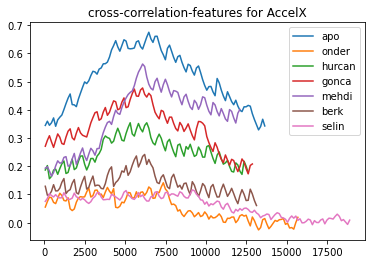

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
labels = data['class'].unique()
for label in labels:
    data_label = data[data['class']==label]
    acc_label_x = data_label.iloc[:,0]
    corr = signal.correlate(acc_label_x,np.ones(len(acc_label_x)),mode='same') / len(acc_label_x)
    clock= np.arange(64, len(acc_label_x), 128)
    plt.plot(clock, corr[clock],label= label)
plt.legend()
plt.title('cross-correlation-features for AccelX')
plt.show()

Todas as características. Modelo salvo em "data_prossed"

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
data_featured = pd.DataFrame()
data_prossed = pd.DataFrame()
labels = data['class'].unique()

for col in np.array([0,1,2,4,5,6]):    
    for label in labels:
        data_label = data[data['class']==label]
        acc_label_x = data_label.iloc[:,col]
        corr = signal.correlate(acc_label_x,np.ones(len(acc_label_x)),mode='same') / len(acc_label_x)
        data_featured=pd.concat([data_featured,pd.DataFrame(corr)], ignore_index=True)
        #clock= np.arange(64, len(acc_label_x), 128)
        #plt.plot(clock, corr[clock],label= label)
    data_prossed = pd.concat([data_prossed,data_featured],axis=1,ignore_index=True)
    data_featured = pd.DataFrame()
#plt.legend()
#plt.title('cross-correlation-features for AccelX')
#plt.show()

In [ ]:
data_prossed

,0,1,2,3,4,5
0,0.335816,-1.178194,4.705044,0.201233,0.194161,-2.479797
1,0.335968,-1.178154,4.705750,0.201219,0.194089,-2.479784
2,0.336122,-1.178118,4.706456,0.201206,0.194013,-2.479773
3,0.336269,-1.178084,4.707161,0.201194,0.193934,-2.479765
4,0.336412,-1.178287,4.707869,0.201186,0.193683,-2.479995
...,...,...,...,...,...,...
99353,0.013872,-0.487521,4.873885,0.025477,-0.028620,-1.841336
99354,0.013963,-0.487154,4.873371,0.025390,-0.028386,-1.840768
99355,0.014052,-0.486855,4.872858,0.025273,-0.028073,-1.839946
99356,0.014130,-0.486611,4.872345,0.025148,-0.027737,-1.838944


In [ ]:
data_prossed['class'] = data['class']
x = data_prossed.drop(["class"],axis=1)
y = data_prossed["class"].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True)

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train,y_train)
nb = GaussianNB()
nb.fit(X_train,y_train)
knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbors = k
knn.fit(X_train,y_train)
svm = SVC(random_state = 1)
svm.fit(X_train,y_train)
print("SVM accuracy is :",svm.score(X_test,y_test))
print('accuracy of bayes in test data is :', nb.score(X_test,y_test))
print('acc_of_sgd is: ', sgd.score(X_test,y_test))
print('acc_knn: ',knn.score(X_test,y_test))

SVM accuracy is : 0.8371980676328502
accuracy of bayes in test data is : 0.6332125603864734
acc_of_sgd is:  0.7215780998389694
acc_knn:  0.9998792270531401
